In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import scipy as SP
import csv
import numpy as np
import os
import shutil

In [2]:

# State definitions
empty, susceptible, infected, immune =  0, 1, 2, 3
# empty, recovered, healthy, sick, dead = -1, 0, 1, 2, 3

width = 100
height = 100
cmap_reversed = plt.cm.get_cmap('RdYlGn_r')

/tmp/ipykernel_43633/2160917419.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_reversed = plt.cm.get_cmap('RdYlGn_r')


-1.csv
0.csv
1.csv
2.csv
3.csv
4.csv
5.csv


/tmp/ipykernel_43633/2063975727.py:31: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  config = SP.array(initialState)
/tmp/ipykernel_43633/2063975727.py:32: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  nextConfig = SP.zeros([height, width])


6.csv
7.csv
8.csv
9.csv
10.csv
11.csv
12.csv
13.csv
14.csv
15.csv
16.csv
17.csv
18.csv
19.csv
20.csv
21.csv
22.csv
23.csv
24.csv
25.csv
26.csv
27.csv
28.csv
29.csv
30.csv
31.csv
32.csv
33.csv


34.csv


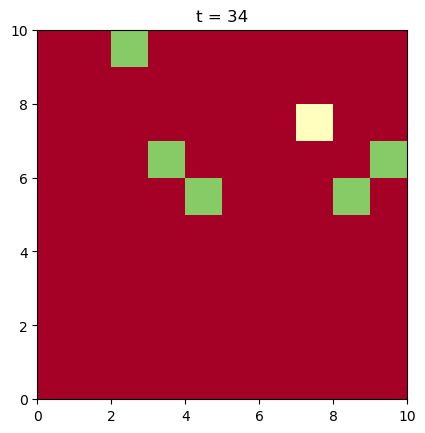

In [33]:
# Sort
path_list = os.listdir("./Data")
path_list.sort(key=lambda f: int(f.split('.')[0]))

if(path_list[0] != "-1.csv"):
    # Copy first file and resort
    shutil.copyfile("./Data/"+path_list[0], "./Data/-1.csv")
    
    path_list = os.listdir("./Data")
    path_list.sort(key=lambda f: int(f.split('.')[0]))

path_list_iter = path_list.__iter__()

count = 0

# Read initial states from a CSV file
def readInitialState(filePath):
    initialState = []
    with open(filePath, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            initialState.append(list(map(int, row)))
    return initialState

# Initialize function
def init(filePath):
    global time, config, nextConfig

    time = 0
    initialState = readInitialState(filePath)
    config = SP.array(initialState)
    nextConfig = SP.zeros([height, width])

# Modify the draw function for animation
def update(frame):
    file_path = next(path_list_iter)
    print(file_path)
    init("./Data/" + file_path)
    plt.cla()
    plt.pcolor(config, vmin=-1, vmax=3, cmap=cmap_reversed)
    plt.axis('image')
    plt.title('t = ' + file_path.split('.')[0])

# init("./Data/" + next(path_list_iter))
fig, ax = plt.subplots()  # Create a figure and axis object for the plot

ani = FuncAnimation(fig, update, frames=len(path_list)-2, repeat=False)

# To display the animation in a Jupyter notebook, use IPython.display.HTML
from IPython.display import HTML
HTML(ani.to_jshtml())  # Renders the animation as HTML5 video
